# load_linnerud_pytoch_regression

In [1]:
from sklearn.datasets import load_linnerud
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = load_linnerud()

In [3]:
print(type(data))
print(data.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['DESCR', 'target_filename', 'target_names', 'data', 'target', 'feature_names', 'data_filename'])


In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target0'] = data.target[:, 0]
df['target1'] = data.target[:, 1]
df['target2'] = data.target[:, 2]

In [5]:
df.head()

,Chins,Situps,Jumps,target0,target1,target2
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


In [6]:
df.tail()

,Chins,Situps,Jumps,target0,target1,target2
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


In [7]:
df.describe()

,Chins,Situps,Jumps,target0,target1,target2
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,9.450000,145.550000,70.30000,178.600000,35.400000,56.100000
std,5.286278,62.566575,51.27747,24.690505,3.201973,7.210373
min,1.000000,50.000000,25.00000,138.000000,31.000000,46.000000
25%,4.750000,101.000000,39.50000,160.750000,33.000000,51.500000
50%,11.500000,122.500000,54.00000,176.000000,35.000000,55.000000
75%,13.250000,210.000000,85.25000,191.500000,37.000000,60.500000
max,17.000000,251.000000,250.00000,247.000000,46.000000,74.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
Chins      20 non-null float64
Situps     20 non-null float64
Jumps      20 non-null float64
target0    20 non-null float64
target1    20 non-null float64
target2    20 non-null float64
dtypes: float64(6)
memory usage: 1.0 KB


In [9]:
print(df.isnull().sum())

Chins      0
Situps     0
Jumps      0
target0    0
target1    0
target2    0
dtype: int64


In [ ]:
df.plot()

In [ ]:
sns.pairplot(df)

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [11]:
class LinnerudModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinnerudModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 16),
            nn.ReLU(),
            nn.Linear(16, output_size)
        )
        
    def forward(self, x):
        output = self.model(x)
        return output

In [12]:
X = torch.Tensor(data.data)
y = torch.Tensor(data.target)

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # train과 test를 8:2로 분할

In [14]:
model = LinnerudModel(3, 3) # 입력은 10, 출력은 하나의 숫자

In [15]:
n = 0
y = model(X_train[n]).detach() # 더 이상 연산을 추적하지 않는다
print(y, y_train[n])

tensor([ 1.0984, -1.0032, -0.3314]) tensor([193.,  36.,  46.])


In [16]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [17]:
print(model)

LinnerudModel(
  (model): Sequential(
    (0): Linear(in_features=3, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=3, bias=True)
  )
)


In [18]:
model = LinnerudModel(3, 3) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

n_epochs = 10000 # 10000회 학습

avg_loss = 0 
for epoch in range(n_epochs):
    y = model(X_train)
    target = torch.unsqueeze(y_train, dim=1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print('epoch {}th loss: {}'.format(epoch, loss.data))

/usr/local/lib/python3.5/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([16, 1, 3])) that is different to the input size (torch.Size([16, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 0th loss: 11283.6123046875
epoch 1000th loss: 2086.906982421875
epoch 2000th loss: 1990.9588623046875
epoch 3000th loss: 1843.060546875
epoch 4000th loss: 1451.4210205078125
epoch 5000th loss: 877.6635131835938
epoch 6000th loss: 399.7392578125
epoch 7000th loss: 214.8681182861328
epoch 8000th loss: 191.9901123046875
epoch 9000th loss: 188.25914001464844


In [19]:
n = 15
y = model(X_train[n]).detach() # 더 이상 연산을 추적하지 않는다
print(y, y_train[n])

tensor([181.6937,  35.6900,  55.2183]) tensor([189.,  35.,  46.])


In [20]:
model = LinnerudModel(3, 3) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
criterion = nn.MSELoss()

n_epochs = 10000 # 10000회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    model.train()
    y = model(X_train)
    target = torch.unsqueeze(y_train, dim=1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        model.eval()
        y_pred = model(X_test).squeeze(dim=1)
        test_loss = criterion(y_pred, y_test).sum()
        print('epoch {}th training loss: {} test loss: {}'.format(epoch, loss.data, test_loss.data))
        list_training_loss.append(loss.data)
        list_test_loss.append(test_loss.data)

/usr/local/lib/python3.5/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([16, 1, 3])) that is different to the input size (torch.Size([16, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 0th training loss: 13918.1103515625 test loss: 12556.7041015625
epoch 1000th training loss: 2432.22900390625 test loss: 1964.2100830078125
epoch 2000th training loss: 2061.459716796875 test loss: 1832.5401611328125
epoch 3000th training loss: 1990.548828125 test loss: 1844.1363525390625
epoch 4000th training loss: 1882.9970703125 test loss: 1939.5872802734375
epoch 5000th training loss: 1714.7841796875 test loss: 2223.595947265625
epoch 6000th training loss: 1500.7642822265625 test loss: 2250.38134765625
epoch 7000th training loss: 1260.03857421875 test loss: 2018.140625
epoch 8000th training loss: 998.4961547851562 test loss: 1644.6727294921875
epoch 9000th training loss: 714.6681518554688 test loss: 1401.9637451171875


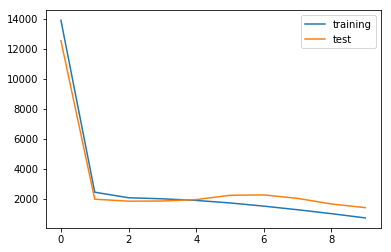

In [21]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import r2_score

with torch.no_grad():
    y_pred = model(X_test)
    score = r2_score(y_test, y_pred)
    print(score)

-1.362132772078409
